In [20]:
!pip install -r requirements.txt

  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)
  Using cached dotmap-1.3.23-py3-none-any.whl (10 kB)
Processing /home/jovyan/.cache/pip/wheels/a0/18/0a/8ad18a597d8333a142c9789338a96a6208f1198d290ece356c/resampy-0.2.2-py3-none-any.whl
  Using cached pooch-1.4.0-py3-none-any.whl (51 kB)
Processing /home/jovyan/.cache/pip/wheels/ba/7b/eb/213741ccc0678f63e346ab8dff10495995ca3f426af87b8d88/audioread-2.1.9-py3-none-any.whl
  Using cached SoundFile-0.10.3.post1-py2.py3-none-any.whl (21 kB)


In [21]:
import tensorflow as tf
import data_utils
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
Model_Folder = "TEST_MODEL_0608"

In [3]:
model = tf.keras.models.load_model(Model_Folder+'/model.valid_00.best_val.h5')

In [4]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 216, 128)]   0                                            
__________________________________________________________________________________________________
gaussian_dropout_5 (GaussianDro (None, 216, 128)     0           input_2[0][0]                    
__________________________________________________________________________________________________
dropout_16 (Dropout)            (None, 216, 128)     0           gaussian_dropout_5[0][0]         
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 216, 128)     0           dropout_16[0][0]                 
_______________________________________________________________________________________

In [5]:
logits_output = model.layers[-6].output
outputs = [logits_output]
wierd_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)

In [10]:
import data_utils 

train/train_01077.wav label 5 : Other


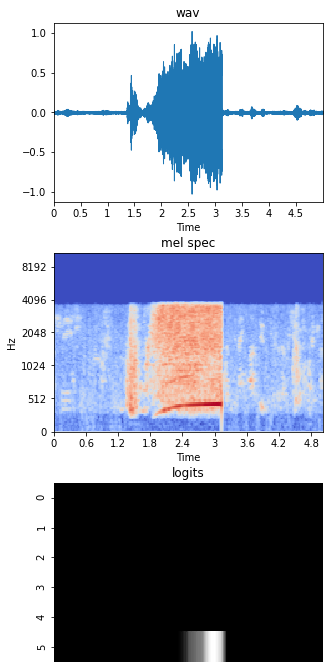

In [39]:
vmin = {
  0:0,
  None:None
}[0]
name = "train/train_01077.wav"
wav, sr, label, remark = data_utils.load_wav(name)
mel = data_utils.wav_to_mel(wav)
label_map = {
  idx:remark for (idx, remark) in enumerate([
    "Barking", "Howling", "Crying", "COSmoke", "GlassBreaking", "Other"
  ])
}
print(name, f"label {label} : {label_map[label]}")
fig, axs = plt.subplots(3,1, figsize=(5,10))
fig.tight_layout(pad=3)
librosa.display.waveplot(wav, sr=22050, ax=axs[0])

librosa.display.specshow(mel, sr=22050, x_axis="time", y_axis="mel",ax=axs[1])

out_logits = wierd_model.predict(mel.T[tf.newaxis])

sns.heatmap(out_logits[0].T, ax=axs[2], cbar=False, vmin=vmin, xticklabels=False, cmap="Greys_r")

for ax, title in zip(axs, ["wav", "mel spec","logits"]):
  ax.set_title(title)
plt.show()

In [1]:
import matplotlib.pyplot as plt
import glob
import json

In [4]:
FOLDER = "TEST_MODEL_0608/"

In [5]:
files = sorted(glob.glob(FOLDER+"history.*.json"))
files

['TEST_MODEL_0608/history.valid_00.json',
 'TEST_MODEL_0608/history.valid_01.json',
 'TEST_MODEL_0608/history.valid_02.json',
 'TEST_MODEL_0608/history.valid_03.json',
 'TEST_MODEL_0608/history.valid_04.json',
 'TEST_MODEL_0608/history.valid_05.json',
 'TEST_MODEL_0608/history.valid_06.json',
 'TEST_MODEL_0608/history.valid_07.json',
 'TEST_MODEL_0608/history.valid_08.json',
 'TEST_MODEL_0608/history.valid_09.json',
 'TEST_MODEL_0608/history.valid_10.json',
 'TEST_MODEL_0608/history.valid_11.json']

In [6]:
import matplotlib.pylab as pylab
params = {'axes.titlesize':30,}
pylab.rcParams.update(params)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


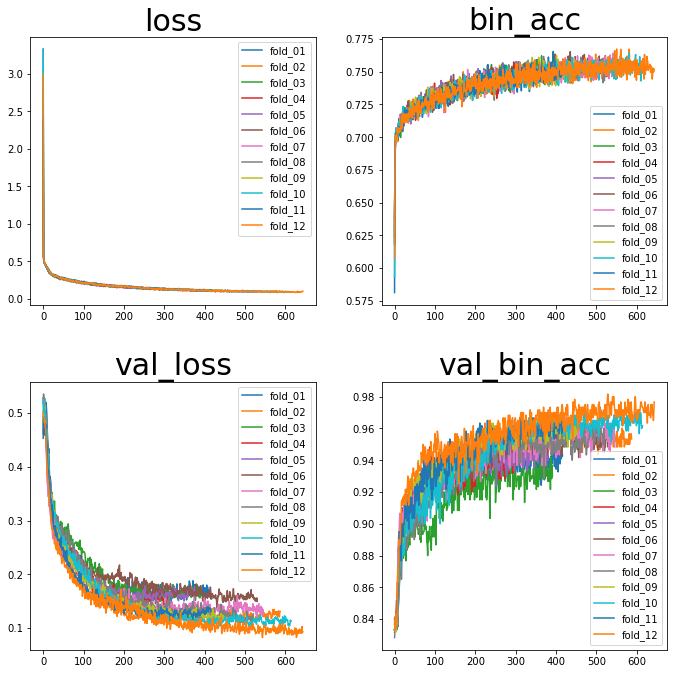

In [7]:
fold = 0
plt.figure(figsize=(10,10))
for DICT in map(lambda name:json.load(open(name)), files):
  fold += 1
  for idx, (name, array) in enumerate(DICT.items()):
    plt.subplot(2,2,idx+1)
    plt.plot(array, label=f"fold_{fold:02d}")
    plt.title(name)
    plt.legend()
  plt.tight_layout(pad=3)
plt.show()

In [9]:
import tensorflow as tf

In [18]:
tf.keras.metrics.binary_accuracy([[1,.1,0]],[0.7,0,0])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.6666667], dtype=float32)>

In [8]:
import tensorflow as tf
from dotmap import DotMap

import tensorflow as tf
import data_utils 
# import tensorflow.experimental.numpy as np
import numpy as np
import os
from pathlib import Path
from functools import partial
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
from tqdm.auto import tqdm
# plt.rcParams["figure.figsize"] = (16, 5)

In [18]:
FOLDER = "TEST_MODEL_0608/"

In [5]:
import dataset_loader as loader

In [6]:
config = {
  "lr":1e-4,
  "multilabel_problem":True,
  "total_folds":12,
  "batch_size_low":32,
  "use_shifted_mel":False,
  "epoches":1000,
}
base_config = loader.load_default_config()
base_config.update(config)
base_config

config = base_config
config

{'seed': 228922,
 'total_folds': 12,
 'cache': True,
 'use_shifted_mel': False,
 'use_remark': False,
 'shift_mel_kwargs': {'n': 5},
 'batch_size_top': 32,
 'batch_size_low': 32,
 'lr': 0.0001,
 'multilabel_problem': True,
 'epoches': 1000}

In [7]:
ds,meta = data_utils.load_TFRecord()
ds = ds.cache()

In [10]:
for _ in tqdm(ds):
  pass

In [12]:
shuffled_ds = ds.shuffle(
  buffer_size = meta["total_files"],
  seed=config.get("seed"),
  reshuffle_each_iteration=False
)

In [48]:
# if config.get("cache"):
#   shuffled_ds = shuffled_ds.cache()
ds_multiple_folds = [
  loader.train_valid_test_split(
    shuffled_ds,
    valid_fold,
    config.get("total_folds"),
    LEN=meta["total_files"]
  )
  for valid_fold in range(config.get("total_folds"))
]

get_mel_label_filename = lambda *item: [item[3], item[5], item[0]]
ds_dirty = [
  [
    data["valid"].map(get_mel_label_filename),
    data["test"].map(get_mel_label_filename),
  ]
  for data in ds_multiple_folds
]

In [49]:
ds_dirty[0][0]

<MapDataset shapes: ((128, 216), (), ()), types: (tf.float32, tf.int64, tf.string)>

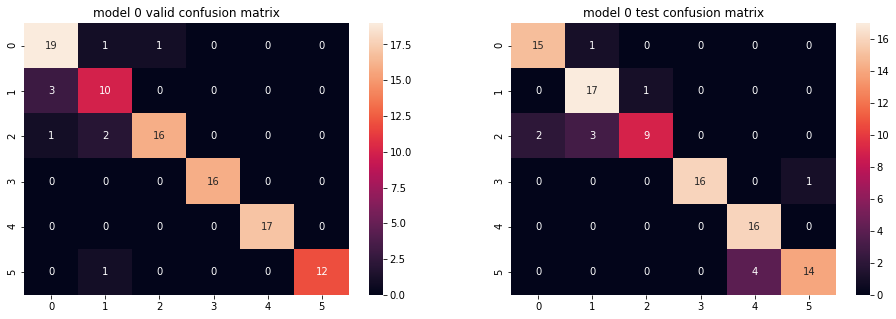

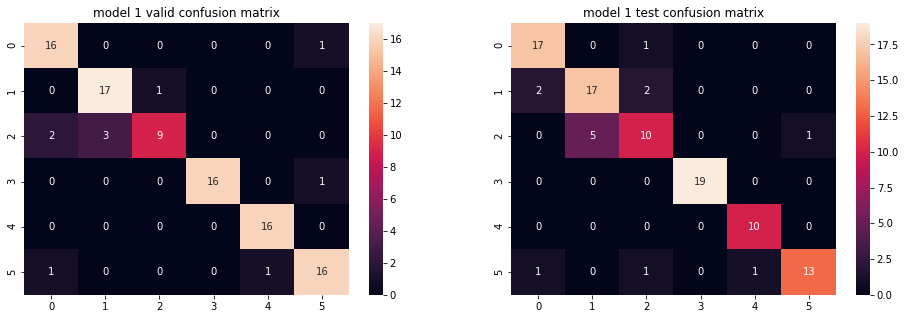

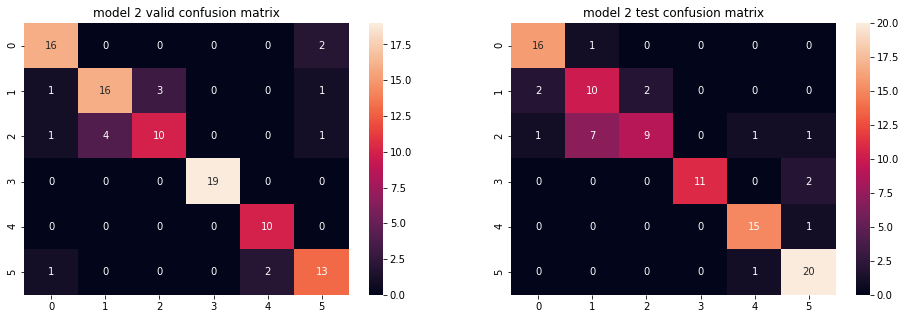

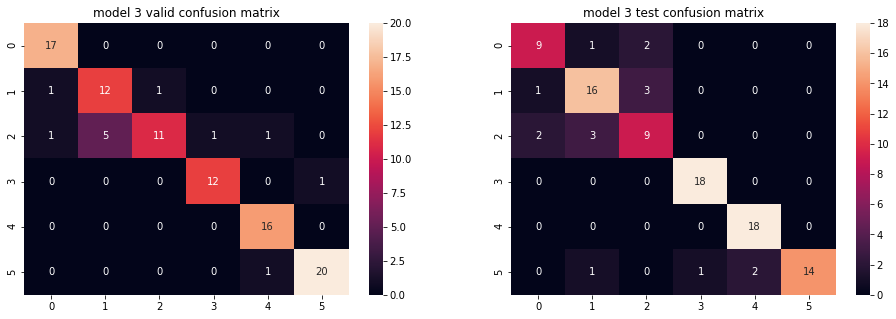

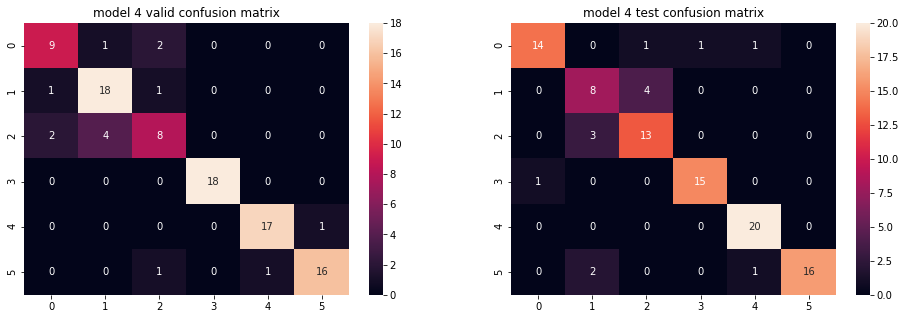

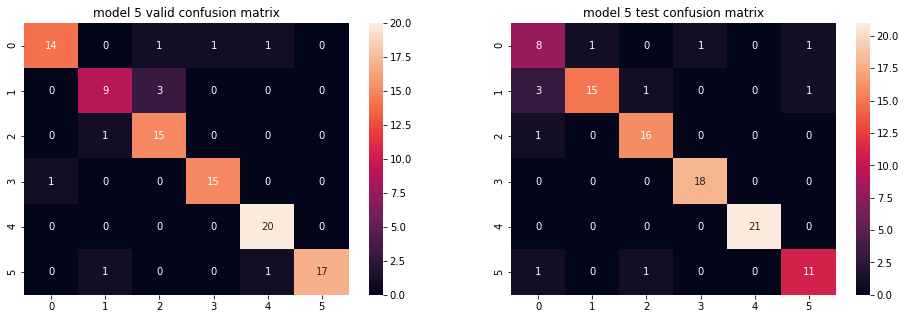

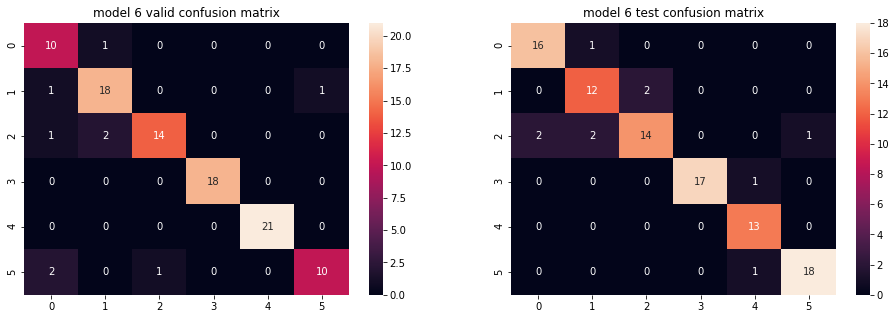

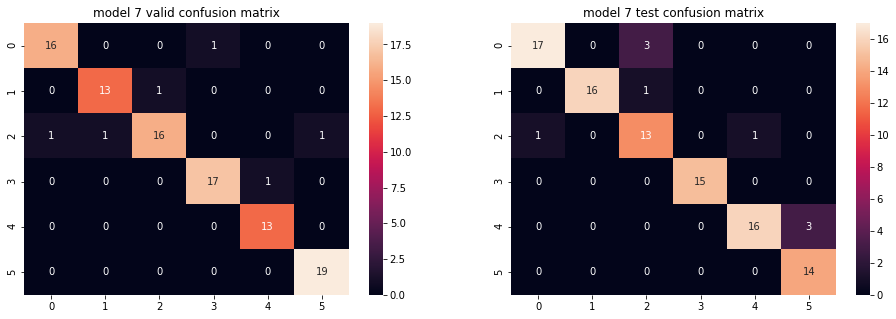

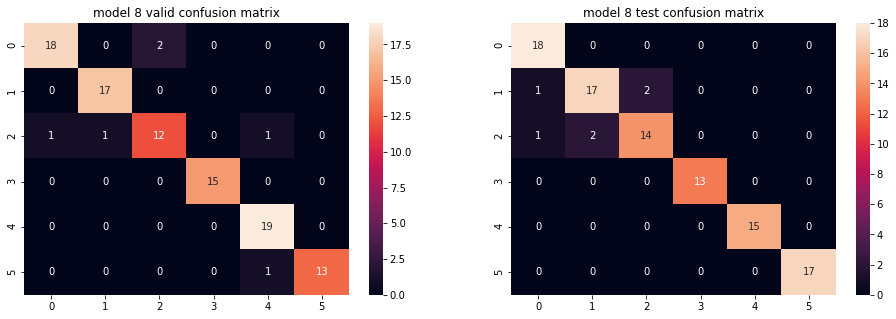

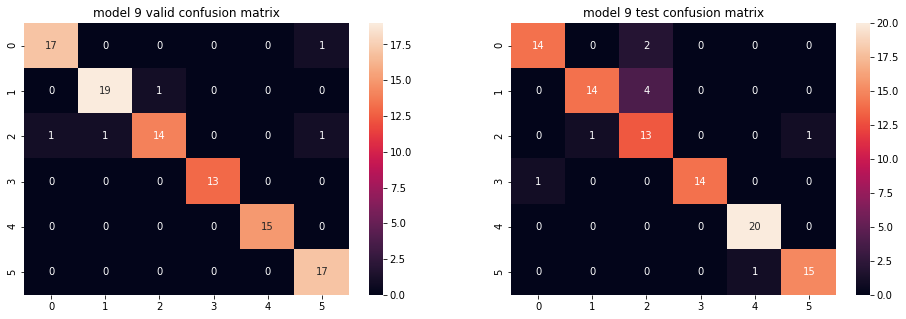

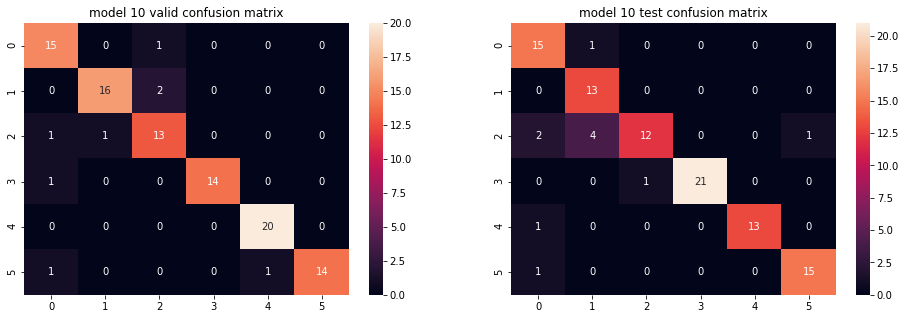

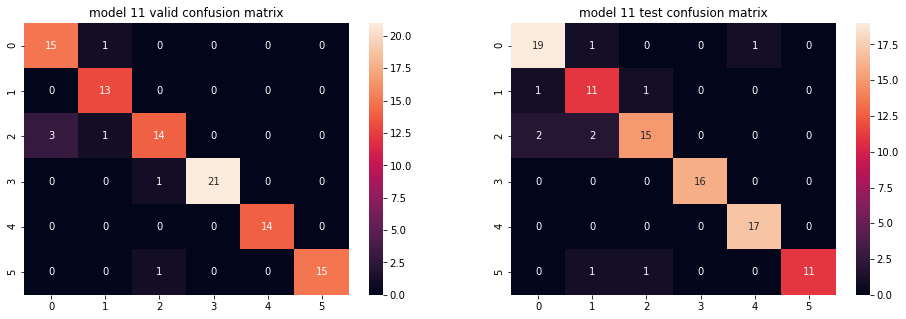

In [50]:
all_valid_cm = []
all_valid_y_logits = []
all_valid_x = []
all_valid_y= []
all_valid_y_pred = []
all_valid_filenames = []

all_test_cm = []
all_test_y_logits = []
all_test_x = []
all_test_y= []
all_test_y_pred = []
all_test_filenames = []

all_models = []

for ith_model, data in zip(range(12), ds_dirty):
#   print("="*200)
#   model = tf.keras.models.load_model(model_folder+f'model.valid_{ith_model:02d}.best_val.best.h5')
  model = tf.keras.models.load_model(FOLDER+f'/model.valid_{ith_model:02d}.best_val.h5')
  all_models.append(model)
#   data = train_valid_test_split(ith_model)
#   valid = data["valid"]
#   test = data["test"]
  valid, test = data

  valid_mels = []
  valid_labels = []
  valid_filenames = []

  test_mels = []
  test_labels = []
  test_filenames = []
  for (mel, label, filename), (test_mel, test_label, test_filename) in zip(valid, test):
    valid_mels.append(mel)
    valid_labels.append(label)
    valid_filenames.append(filename)
    
    test_mels.append(test_mel)
    test_labels.append(test_label)
    test_filenames.append(test_filename)

  valid_x, valid_y = tf.stack(valid_mels, axis=0), tf.stack(valid_labels, axis=0)
  test_x, test_y = tf.stack(test_mels, axis=0), tf.stack(test_labels, axis=0)
  from collections import Counter
  # valid ###########################
  original_valid_class_counter = Counter(valid_y.numpy())
#   print(original_valid_class_counter)
  pred_valid_logits = model(tf.transpose(valid_x,[0,2,1]))
  pred_valid_class = np.argmax(pred_valid_logits, axis=-1)
  plt.figure(figsize=(16, 5))
#   plt.subplot(1,3,1)
#   plt.bar(original_valid_class_counter.keys(), original_valid_class_counter.values())
#   plt.title("original_valid_class_counter")
#   plt.show()
  
  all_valid_x.append(valid_x)
  all_valid_y.append(valid_y)
  all_valid_y_logits.append(pred_valid_logits)
  all_valid_y_pred.append(pred_valid_class)
  all_valid_filenames.append(valid_filenames)

  pred_valid_class_counter = Counter(pred_valid_class)
#   print(pred_valid_class_counter)
#   plt.subplot(1,3,2)
#   plt.bar(pred_valid_class_counter.keys(), pred_valid_class_counter.values())
#   plt.title("predict_valid_class_counter")
#   plt.show()
  valid_cm = sklearn.metrics.confusion_matrix(valid_y, pred_valid_class)
  all_valid_cm.append(valid_cm)
#   plt.subplot(1,3,3)
  plt.subplot(1,2,1)
  sns.heatmap(valid_cm, annot=True)
  plt.title(f"model {ith_model} valid confusion matrix")
#   plt.show()
  
  # test ###########################
  original_test_class_counter = Counter(test_y.numpy())
#   print(original_test_class_counter)
  pred_test_logits = model(tf.transpose(test_x, [0,2,1]))
  pred_test_class = np.argmax(pred_test_logits, axis=-1)

#   plt.figure(figsize=(16, 5))
#   plt.subplot(1,3,1)
#   plt.bar(original_test_class_counter.keys(), original_test_class_counter.values())
#   plt.title("original_test_class_counter")
# #   plt.show()
  
  all_test_x.append(test_x)
  all_test_y.append(test_y)
  all_test_y_logits.append(pred_test_logits)
  all_test_y_pred.append(pred_test_class)
  all_test_filenames.append(test_filenames)

  pred_test_class_counter = Counter(pred_test_class)
#   print(pred_test_class_counter)
#   plt.subplot(1,3,2)
#   plt.bar(pred_test_class_counter.keys(), pred_test_class_counter.values())
#   plt.title("predict_test_class_counter")
#   plt.show()
  test_cm = sklearn.metrics.confusion_matrix(test_y, pred_test_class)
  all_test_cm.append(test_cm)

#   plt.subplot(1,3,3)
  plt.subplot(1,2,2)
  sns.heatmap(test_cm, annot=True)
  plt.title(f"model {ith_model} test confusion matrix")
  plt.show()

TEST_MODEL_0608/


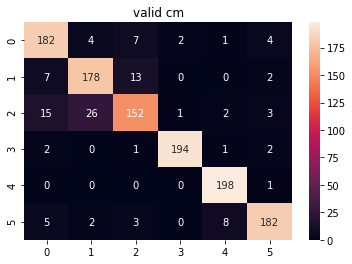

In [51]:
print(FOLDER)
sns.heatmap(np.sum(all_valid_cm,axis=0), annot=True, fmt="d")#, vmax=30)
plt.title("valid cm")
plt.show()

TEST_MODEL_0608/


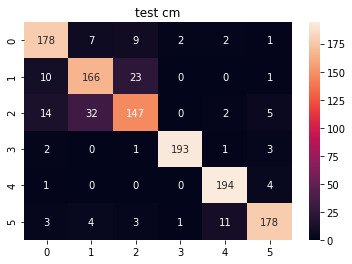

In [52]:
print(FOLDER)
sns.heatmap(np.sum(all_test_cm,axis=0), annot=True, fmt="d")#, vmax=30)
plt.title("test cm")
plt.show()